In [2]:
#Course : CS 513 - Knowledge discovery and Data mining
#Course Instructor:- Khashayar Dehnad
#First Name: Keval
#Last Name: Sompura
#Id: 20033127
#Assignment: 06 - C50 Decision Tree and Random Forest
#Description: This program is implementation of C50 Decision Tree and Random Forest using Python.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [4]:
headers = ["SampleCode", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion", "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses", "Class"]

In [5]:
folder='C:/Users/Asus/OneDrive/Stevens/Sem-2/KDDM/HW6/'
file='breast-cancer-wisconsin.csv'
data = pd.read_csv(folder+file, header=None,skiprows=1, names=headers,na_values='?')
data.head()

,SampleCode,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [6]:
data['Class'] = data['Class'].map({2: 'Benign', 4: 'Malignant'})
data.head()

,SampleCode,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,Benign
1,1002945,5,4,4,5,7,10.0,3,2,1,Benign
2,1015425,3,1,1,1,2,2.0,3,1,1,Benign
3,1016277,6,8,8,1,3,4.0,3,7,1,Benign
4,1017023,4,1,1,3,2,1.0,3,1,1,Benign


In [7]:
X = data.drop(columns=['SampleCode', 'Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

model = DecisionTreeClassifier(criterion='entropy', random_state=62)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=62)

In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

      Benign       0.93      0.97      0.95       140
   Malignant       0.94      0.84      0.89        70

    accuracy                           0.93       210
   macro avg       0.93      0.91      0.92       210
weighted avg       0.93      0.93      0.93       210

Confusion Matrix:
 [[136   4]
 [ 11  59]]


In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=X.columns)

[Text(0.3897058823529412, 0.9444444444444444, 'UniformityCellSize <= 2.5\nentropy = 0.934\nsamples = 489\nvalue = [318, 171]'),
 Text(0.11764705882352941, 0.8333333333333334, 'BlandChromatin <= 4.5\nentropy = 0.181\nsamples = 292\nvalue = [284, 8]'),
 Text(0.2536764705882353, 0.8888888888888888, 'True  '),
 Text(0.058823529411764705, 0.7222222222222222, 'BareNuclei <= 5.5\nentropy = 0.061\nsamples = 282\nvalue = [280, 2]'),
 Text(0.029411764705882353, 0.6111111111111112, 'entropy = 0.0\nsamples = 279\nvalue = [279, 0]'),
 Text(0.08823529411764706, 0.6111111111111112, 'UniformityCellSize <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.058823529411764705, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.11764705882352941, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.17647058823529413, 0.7222222222222222, 'ClumpThickness <= 4.0\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(0.14705882352941177, 0.6111111111111112, 'entropy = 0.0\nsamples 

In [10]:
#Random Forest

In [11]:
data = pd.read_csv(folder+file, header=None,skiprows=1, names=headers,na_values='?')
data.head()

,SampleCode,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [12]:
X = data.drop(columns=['SampleCode', 'Class'])
y = data['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [14]:
RF = RandomForestClassifier()
RF = RF.fit(X_train,y_train)

y_pred = RF.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy)

96.66666666666667


In [16]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[131   4]
 [  3  72]]

Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.97      0.97       135
           4       0.95      0.96      0.95        75

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.96       210
weighted avg       0.97      0.97      0.97       210



In [17]:
important_features = pd.DataFrame({'Feature': X.columns, 'Importance': RF.feature_importances_}).sort_values(by='Importance', ascending=False)
print(important_features)

                    Feature  Importance
1        UniformityCellSize    0.310191
5                BareNuclei    0.200070
2       UniformityCellShape    0.147534
6            BlandChromatin    0.131766
4  SingleEpithelialCellSize    0.067384
0            ClumpThickness    0.057923
7            NormalNucleoli    0.046716
3          MarginalAdhesion    0.029770
8                   Mitoses    0.008647


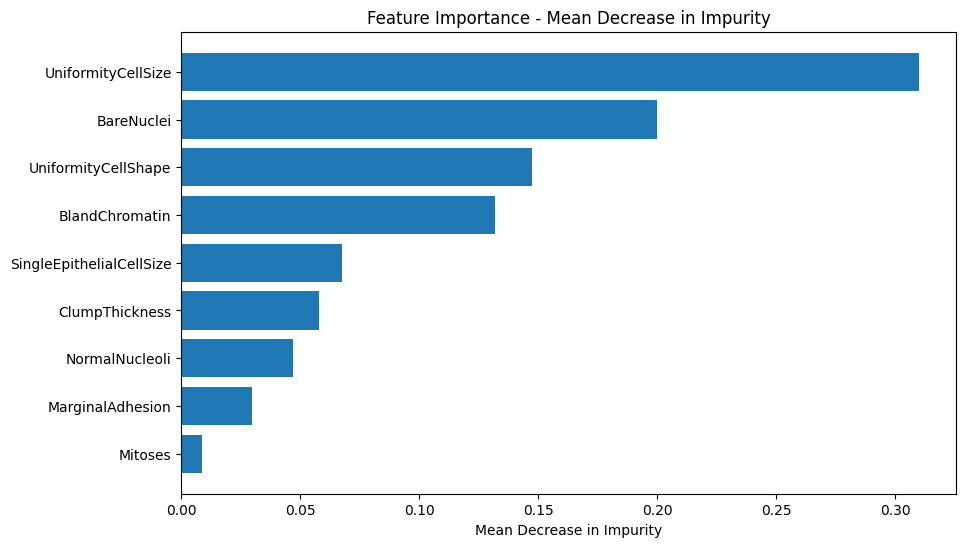

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(important_features['Feature'], important_features['Importance'], align='center')
plt.xlabel('Mean Decrease in Impurity')
plt.title('Feature Importance - Mean Decrease in Impurity')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()